# Confidence Intervals

In [18]:
# Libraries
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt

## Challenge 1
We want to estimate the average size of the men of a country with a confidence level of 80%. Assuming that the standard deviation of the sizes in the population is 4, get the confidence interval with a sample of men selected randomly, whose heights are:

````
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]
````

**Hint**: function `stats.norm.interval` from `scipy` can help you get through this exercise. 

In [5]:
# your code here
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]

x_bar = np.mean(heights)
standard_error = np.std(heights)/np.sqrt(len(heights))

In [12]:
normal = norm(x_bar, standard_error)
confidence_interval = normal.interval(0.8)

confidence_interval

(24.64818572145498, 29.35181427854502)

## Challenge 2 
In a sample of 105 shops selected randomly from an area, we note that 27 of them have had losses in this month. Get an interval for the proportion of businesses in the area with losses to a confidence level of 80% and a confidence level of 90%.

**Hint**: function `stats.norm.interval` from `scipy` can help you get through this exercise. 

In [25]:
# your code here
len_sample = 105
p = 27/105

#N(p, sqr_root(p*(1-p)/len_sample))

student = t(df = len_sample-1, loc = p, scale = np.sqrt(p*(1-p)/len_sample))
student.interval(0.8)

(0.2021319222413539, 0.31215379204436033)

In [26]:
student.interval(0.9)

(0.18635505023962584, 0.3279306640460884)

## Bonus Challenge
The error level or sampling error for the first challenge is given by the following expression:
$$Error = z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt n}$$
Where z represents the value for N(0,1)


Suppose that with the previous data of challenge 1, and with a confidence level of
99% (that is, almost certainly) we want to estimate the average population size, so that the error level committed is not greater than half a centimeter.

#### 1.- Determine what size the selected sample of men should be.

In [14]:
# your code here

# n = (z * sigma/error)^2

z = 2.58
sigma = 4
error = 0.5

n = (z * sigma/error)**2
n

426.00960000000003

#### 2.- For the second challenge, we have the following error:
$$ Error = z_{\frac{\alpha}{2}}\sqrt{\frac{p\times q}{n}} $$
#### Determine the sample size required to not exceed an error of 1% with a confidence of 80%.

In [29]:
# your code here

# n = (z * sqr_root(p*q) / error)^2

z = 1.645
p = 27/105
q = 1 - p
error = 0.01

n = (z * np.sqrt(p*q) / error)**2
n

5169.0599999999995

## Bonus Challenge

Let's consider the following problem:

Build a confidence interval of 94% for the real difference between the durations of two brands of spotlights, if a sample of 40 spotlights taken randomly from the first mark gave an average duration of 418 hours, and a sample of 50 bulbs of another brand gave a duration average of 402 hours. The standard deviations of the two
populations are 26 hours and 22 hours, respectively.

Sometimes, we will be interested in the difference of two different groups of random variables. We can also build a confidence interval for that! We have some different cases regarding the variance but for this specific case (the variance are different and known), we have that:

$$\overline{X} - \overline{Y}  \sim N(\mu_{X} - \mu_{Y} , \sqrt{\frac{\sigma_{X}^2}{n_X}+\frac{\sigma_{Y}^2}{n_Y}})$$

Solve the problem with this information.

In [2]:
# your code here

sample_size1 = 40
mean1 = 418
std_dev1 = 26

sample_size2 = 50
mean2 = 402
std_dev2 = 22

sample_mean = mean1-mean2

standard_error = np.sqrt(std_dev1**2/sample_size1 + std_dev2**2/sample_size2)


In [4]:
normal = norm(sample_mean, standard_error)

In [6]:
lower, upper = normal.interval(0.94)

print(lower, upper)

6.303419026585921 25.69658097341408


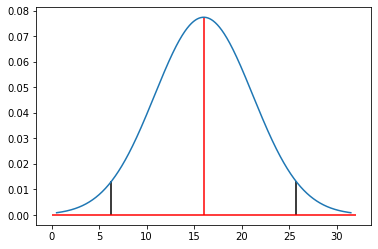

In [13]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(sample_mean - 3*standard_error,sample_mean + 3*standard_error,1000)
y = normal.pdf(x)
ax.plot(x,y)
plt.vlines(lower,0,normal.pdf(lower))
plt.vlines(upper,0,normal.pdf(upper))
plt.vlines(sample_mean,0,normal.pdf(sample_mean), color = 'red')
plt.hlines(0, 0,32, colors = 'r')
plt.show()